

---
<p align="left">
  <big>
    <b>
      <pre>
Camila Manara Ribeiro                - RA: 760465 
Júlia Aparecida Sousa de Oliveira    - RA: 769707 
Luciana Oliveira de Souza Gomes      - RA: 743569
Rafael Vinicius Polato Passador      - RA: 790036 
      </pre>
      <br>
      Disciplina: Aprendizado de Máquina
      <br>
      Professor: Prof. Dr. Diego Furtado Silva
      <br>
    </b>
  </big>
</p>


---

# Carregando Bibliotecas necessárias

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from pandas.plotting import andrews_curves


In [46]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans


# Carregando Dataset

In [47]:
iris_dataset = pd.read_csv("Iris.csv")


In [48]:
iris_dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [49]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
iris_dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [51]:
iris_dataset.isnull()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [52]:
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


>**Gráfico de dispersão do comprimento e largura das sépalas**




*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


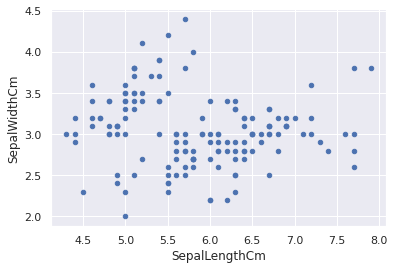

In [53]:
iris_dataset.plot(kind="scatter", x="SepalLengthCm",   y="SepalWidthCm")
plt.show()

> **Gráfico de dispersão do comprimento e largura das pétalas**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


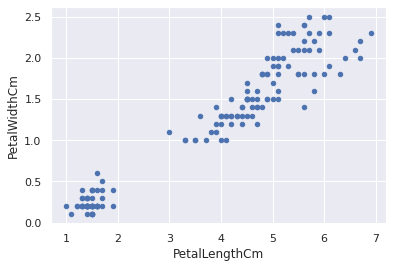

In [54]:
iris_dataset.plot(kind="scatter", x="PetalLengthCm",   y="PetalWidthCm")
plt.show()

> **Gráfico de Andrews das espécies**

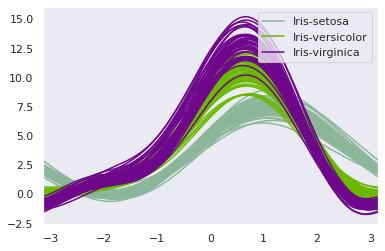

In [55]:

andrews_curves(iris_dataset.drop("Id", axis=1), "Species")
plt.show()

# Modelando com K-means

O K-means é um algoritmo de agrupamento que visa particionar n observações em k agrupamentos.
1. **Inicialização** - K "meios" iniciais (centróides) são gerados aleatoriamente

2.  **Atribuição** - K clusters são criados associando cada observação com o centróide mais próximo.
3.  **Atualização** - O centróide dos clusters torna-se a nova média. 

Atribuição e Atualização são repetidos iterativamente até a convergência.
  
  O resultado é que a soma dos quadrados dos erros é minimizada entre os pontos e seus respectivos centróides. Usaremos o clustering do KMeans. Em primeiro lugar, encontraremos os clusters ideais com base na inércia e usando o método do cotovelo. A distância entre os centróides e os pontos de dados deve ser a menor.

In [56]:
iris_dataset.drop('Id', axis=1, inplace=True)
iris_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Separamos os dados em duas variáveis:

*   **especies_target**: os dados alvos que contem as espécies
*   **clustering_data**: os dados de treinamento que contem os atributos utilizados para o clustering



In [57]:
especies_target = iris_dataset.iloc[:,4]
especies_target.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [58]:
clustering_data = iris_dataset.iloc[:,[0,1,2,3]]
clustering_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


> **Representação gráfica das variáveis**

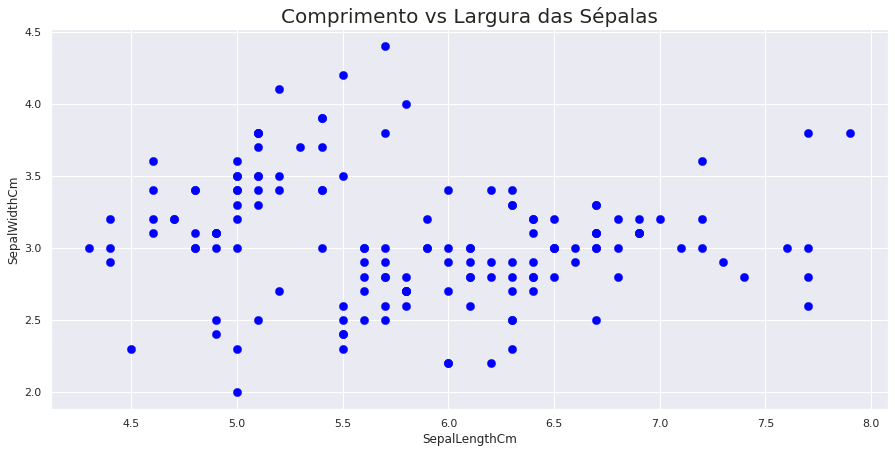

In [59]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=iris_dataset['SepalLengthCm'],y=iris_dataset['SepalWidthCm'], s=70, color='#0000ff', edgecolor='#0000ff', linewidth=0.3)
ax.set_ylabel('SepalWidthCm')
ax.set_xlabel('SepalLengthCm')
plt.title('Comprimento vs Largura das Sépalas', fontsize = 20)
plt.show()

## Modelo Pré-Elbow


>Como o K-means é um algoritimo não supervisionado, não utiliza os valores das classes para criar o modelo. Assim a variável X armazena apenas os valores dos atributos SepalLength, SepalWidth, PetalLength e PetalWidth.

In [60]:
X = iris_dataset.iloc[:, 0:4].values

X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

>Inicialmente, vamos utilizar os valores padrão de paramentros da função Kmeans(), com o número de clusters = 8 e com o modo k-means++, em que os centroides são gerados de modo a favorecer a convergência.
>Além disso, o método fit() agrupa os dados e kmeans.cluster_centers mostra os centroides gerados, retornando um vetor com o número de instâncias igual ao número de clusters definido previamente.

In [61]:
clustering = KMeans(n_clusters = 8, init = 'k-means++')
clustering.fit(X)
clustering.cluster_centers_


array([[7.475     , 3.125     , 6.3       , 2.05      ],
       [5.25555556, 3.67037037, 1.5037037 , 0.28888889],
       [6.43      , 2.94      , 4.59      , 1.435     ],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.62083333, 2.69166667, 4.075     , 1.2625    ],
       [4.71304348, 3.12173913, 1.4173913 , 0.19130435],
       [6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [5.        , 2.3       , 3.275     , 1.025     ]])

>A função fit_transform() agrupa os dados retornando uma tabela de distâncias entre cada intância e o cluster gerado

In [62]:
tabela_distancia = clustering.fit_transform(X)
tabela_distancia

array([[4.82618118, 0.26810313, 4.14144589, ..., 3.0346666 , 3.7126574 ,
        0.54147457],
       [4.87397796, 0.77102003, 4.12868242, ..., 2.98315293, 3.74777601,
        0.2239447 ],
       [5.03047325, 0.76110886, 4.29177724, ..., 3.1521212 , 3.925535  ,
        0.14195502],
       ...,
       [0.38990357, 4.3114436 , 0.60499464, ..., 1.63631743, 0.83655544,
        4.55933576],
       [0.52068772, 4.49341387, 0.93179437, ..., 1.91551596, 1.2918301 ,
        4.75355006],
       [0.88123223, 4.01017567, 0.30444242, ..., 1.2298515 , 0.82330128,
        4.19203944]])

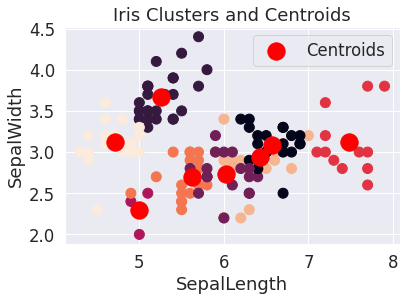

In [63]:
plt.scatter(X[:, 0], X[:,1], s = 100, c = clustering.labels_)
plt.scatter(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Iris Clusters and Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

plt.show()

##Método Elbow

Esse método realiza o agrupamento de k-means no dataset considerando um intervalo de valores para k, sendo que cada um desses calcula uma pontuação média para os clusters.

Usualmente, esse cálculo é feito pela soma dos quadrados das distâncias de cada ponto ao centro que lhe foi atribuído.
Assim, a partir da plotagem da métrica, faz-se a determinação do melhor de valor k pela visualização no gráfico. 

Ao observar a curva gerada tem-se um ponto de inflexão, o formato de “cotovelo” indicará o melhor k.
Esse método usa a soma de quadrados dentro do cluster (também chamado de wcss) em relação ao valor (número de clusters) para descobrir o valor ideal de grupos, a partir de teste da variância desses dados.  Esse valor de k é considerado ideal, quando em caso de aumento do número de clusters não haja um valor significativo de ganho. 


In [64]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(clustering_data)
    wcss.append(kmeans.inertia_)
np.array(wcss)

array([680.8244    , 152.36870648,  78.94084143,  57.31787321,
        46.55057267,  38.93096305,  34.27727508,  29.91463345,
        27.76542447,  26.36135137])

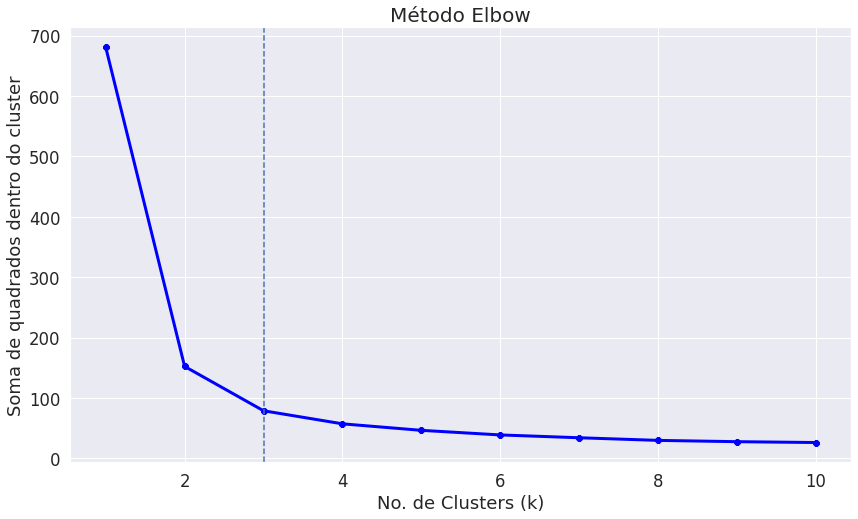

In [65]:
fig, ax = plt.subplots(figsize=(14,8))
ax = plt.plot(range(1,11),wcss, linewidth=3, color="blue", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('Soma de quadrados dentro do cluster')
plt.xlabel('No. de Clusters (k)')
plt.title('Método Elbow', fontsize = 20)
plt.show()

##Modelo Pós-Elbow

Como determinamos o número otimizado de clusters para o nosso conjunto de dados, cria-se um novo modelo com n_clusters=3.


In [66]:
clustering_elbow = KMeans(n_clusters=3, init='k-means++')
clustering_elbow.fit(clustering_data)

KMeans(n_clusters=3)

In [67]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = clustering_elbow.fit_predict(clustering_data)
clusters.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster_Prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


>Aqui, vemos o novo vetor de centroides dos clusters gerados

In [68]:
clustering_elbow.cluster_centers_


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

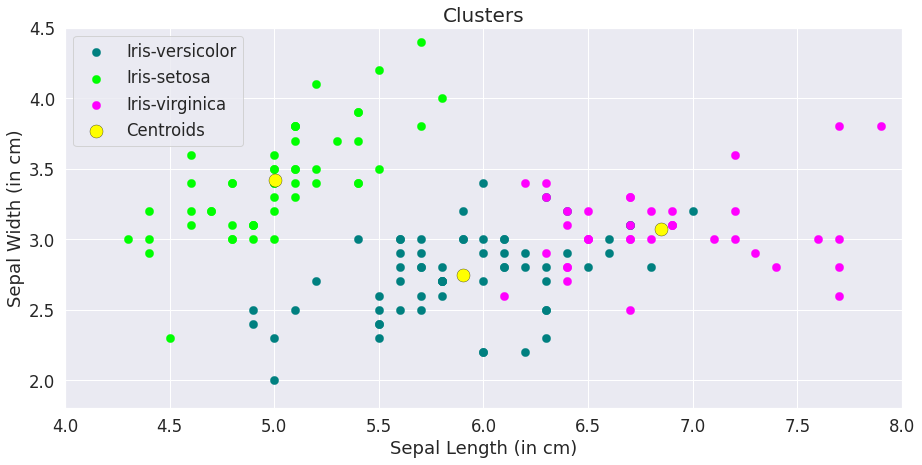

In [69]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['SepalWidthCm'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['SepalWidthCm'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['SepalLengthCm'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['SepalWidthCm'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=clustering_elbow.cluster_centers_[:, 0], y=clustering_elbow.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper left')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

# DBSCAN

DBSCAN significa Clustering Espacial de Aplicatições com Ruído baseado em densidade. Pode-se perceber a partir de seu nome que divide o conjunto de dados em subgrupos com base em regiões densas. O DBSCAN não exige que forneçamos vários clusters antecipadamente.

Definimos 3 tipos diferentes de pontos para DBSCAN:

* Pontos centrais: Um ponto central é um ponto que tem pelo menos um número mínimo de outros pontos (MinPts) em seu épsilon de raio.

* Pontos de fronteira: Um ponto de fronteira é um ponto que não é um 
ponto central, uma vez que não tem MinPts suficiente em sua vizinhança, mas fica dentro do raio épsilon de um ponto central.

* Pontos de ruído: Todos os outros pontos que não são pontos centrais nem pontos de fronteira.

In [70]:
atributos = iris_dataset.iloc[:,0:4]
especies = iris_dataset.iloc[:,4:]



In [71]:
le = preprocessing.LabelEncoder()
Y = le.fit_transform(especies)

Y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [72]:
db = DBSCAN(eps=0.7,min_samples=2,algorithm='kd_tree').fit(atributos)


In [73]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [74]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [75]:
print('Número estimado de clusters: %d' % n_clusters_)
print('Número estimado de pontos de ruído: %d' % n_noise_)
print("Homogeneidade: %0.3f" % metrics.homogeneity_score(Y, labels))

Número estimado de clusters: 3
Número estimado de pontos de ruído: 1
Homogeneidade: 0.592


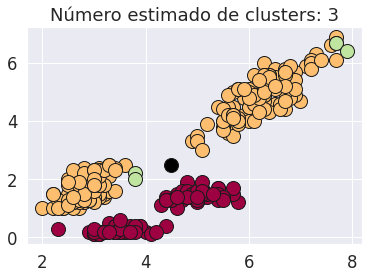

In [76]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]


for k,col in zip(unique_labels, colors):
  if k == -1:
    col=[0,0,0,1]
  
  class_member_mask = (labels == k)

  xy = atributos[class_member_mask & core_samples_mask]
  xy = xy.values
  plt.plot(xy[:,0:2], xy[:,2:4], 'o', markerfacecolor=tuple(col),
           markeredgecolor='k', markersize = 14)

  xy = atributos[class_member_mask & ~core_samples_mask]
  xy = xy.values
  plt.plot(xy[:,2], xy[:,1], 'o', markerfacecolor=tuple(col),
           markeredgecolor='k', markersize = 14)
  

plt.title('Número estimado de clusters: %d' % n_clusters_)
plt.show()